# NLTK and Language Models

## 1. Preliminary steps

In [1]:
import nltk
from nltk.corpus import state_union
from nltk.corpus import inaugural

In [2]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [4]:
print(inaugural.raw('2009-Obama.txt'))

My fellow citizens:

I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.

Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.

So it has been. So it must be with this generation of Americans.

That we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened, a conse

In [5]:
print(inaugural.words('2009-Obama.txt'))

['My', 'fellow', 'citizens', ':', 'I', 'stand', 'here', ...]


In [6]:
print(inaugural.sents('2009-Obama.txt'))

[['My', 'fellow', 'citizens', ':'], ['I', 'stand', 'here', 'today', 'humbled', 'by', 'the', 'task', 'before', 'us', ',', 'grateful', 'for', 'the', 'trust', 'you', 'have', 'bestowed', ',', 'mindful', 'of', 'the', 'sacrifices', 'borne', 'by', 'our', 'ancestors', '.'], ...]


## 2. The lm module: basics

In [21]:
from nltk.util import ngrams
from nltk.lm import NgramCounter, Vocabulary
import matplotlib.pyplot as plt
import numpy as np

In [15]:
text_unigrams = [ngrams(sent, 1) for sent in state_union.sents()]
ngram_counts=NgramCounter(text_unigrams)
print(ngram_counts.N())

399829


In [14]:
print(ngram_counts['the'])
print(ngram_counts[['the']]['new'])

19191
0


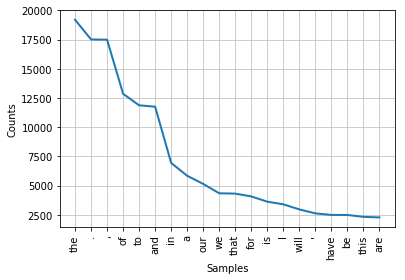

In [22]:
ngram_counts.unigrams.most_common(20)
ngram_counts.unigrams.plot(20)

In [20]:
vocab = Vocabulary(state_union.words(), unk_cutoff=2)
print(len(vocab))

9105


### Exercise 1

<b> Question 1.a : </b>

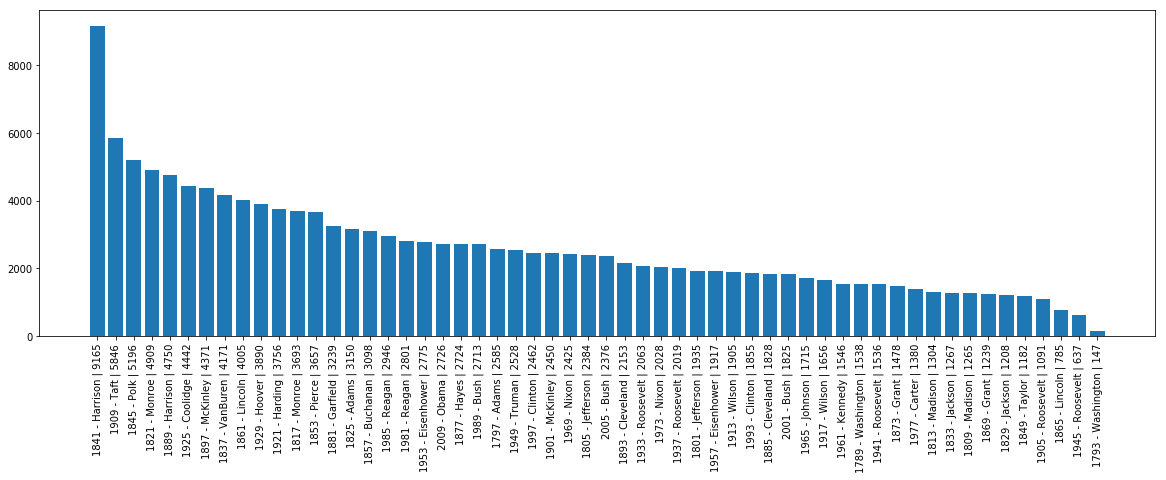

Max: 1841 - Harrison | 9165
Min: 1793 - Washington | 147


In [25]:
results = []

for fileid in inaugural.fileids():
    text_unigrams = [ngrams(sent, 1) for sent in inaugural.sents(fileid)]
    ngram_counts = NgramCounter(text_unigrams)
    res = ngram_counts.N()
    results.append((res, "{} - {} | {}".format(fileid[:4], fileid[5:-4], res)))

results = sorted(results, reverse=True)
results, presidents = map(list, zip(*results))

plt.rcParams['figure.figsize'] = [20, 6]
plt.bar(presidents, results)
plt.xticks(presidents, rotation='vertical')
plt.show()

Harrison held the longest discourse in 1841.
Washington the shortest one in 1793.

<b> Question 1.b : </b>

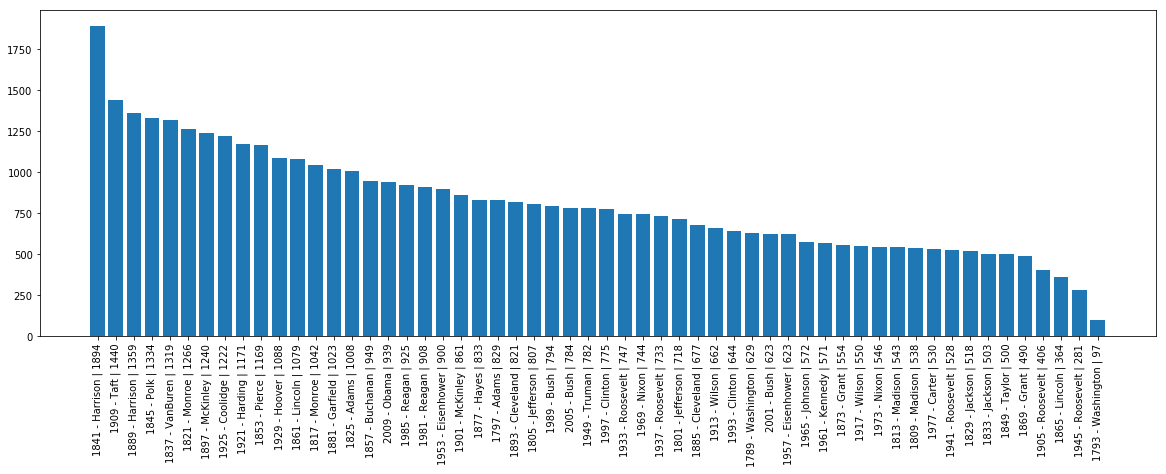

In [28]:
results = []

for fileid in inaugural.fileids():
    vocab = Vocabulary(inaugural.words(fileid), unk_cutoff=1)
    res = len(vocab)
    results.append((res, "{} - {} | {}".format(fileid[:4], fileid[5:-4], res)))

results = sorted(results, reverse=True)
results, presidents = map(list, zip(*results))

plt.rcParams['figure.figsize'] = [20, 6]
plt.bar(presidents, results)
plt.xticks(presidents, rotation='vertical')
plt.show()

Harrison had the richest vocabulary in 1894.

To repeat the experiments in the state_union dataset, just replace inaugural by state_union in the two last code blocks. The rankings are completely different.

## 3. Building a Language Model

In [34]:
from nltk.lm.preprocessing import pad_both_ends, flatten, padded_everygram_pipeline
from nltk.lm import MLE
from nltk.util import bigrams, everygrams

In [33]:
sentence = 'May God bless America.'.split()
print(list(pad_both_ends(sentence, n=2)))
print(list(bigrams(pad_both_ends(sentence, n=2))))
print(list(flatten(pad_both_ends(sentence, n=2))))

['<s>', 'May', 'God', 'bless', 'America.', '</s>']
[('<s>', 'May'), ('May', 'God'), ('God', 'bless'), ('bless', 'America.'), ('America.', '</s>')]
['<', 's', '>', 'M', 'a', 'y', 'G', 'o', 'd', 'b', 'l', 'e', 's', 's', 'A', 'm', 'e', 'r', 'i', 'c', 'a', '.', '<', '/', 's', '>']


In [35]:
train, vocab = padded_everygram_pipeline(2, inaugural.sents())

In [36]:
lm = MLE(2)
lm.fit(train, vocab)
print(lm.counts['America'])
print(lm.counts[['bless']]['America'])
print(lm.score('the'))
print(lm.score('America'))
print(lm.score("America", ["bless"]))

192
2
0.05969602047970361
0.0012349570016273132
0.125


### Exercise 2

In [37]:
train, vocab = padded_everygram_pipeline(2, state_union.sents())

In [38]:
lm = MLE(2)
lm.fit(train, vocab)
print(lm.counts['America'])
print(lm.counts[['bless']]['America'])
print(lm.score('the'))
print(lm.score('America'))
print(lm.score("America", ["bless"]))

1076
12
0.044047474230471735
0.0024696515174815062
0.3


In [43]:
from nltk.lm import KneserNeyInterpolated
train, vocab = padded_everygram_pipeline(2, state_union.sents())
kneser = KneserNeyInterpolated(2)
kneser.fit(train, vocab)
print(kneser.counts['America'])
print(kneser.counts[['bless']]['America'])
print(kneser.score('the'))
print(kneser.score('America'))
print(kneser.score("America", ["bless"]))

1076
12
6.853539853334247e-05
6.853539853334247e-05
0.29750137070797067


## Generation

### Exercise 3

In [46]:
lm.generate(7)

['unity', 'is', 'becoming', 'more', 'often', 'find', 'a']

In [47]:
lm.generate(20)

['balanced',
 '.',
 '</s>',
 'recession',
 'or',
 'cripple',
 'our',
 'lives',
 '.',
 '</s>',
 '</s>',
 'to',
 'divine',
 'command',
 '.',
 '</s>',
 'to',
 'preserve',
 'Social',
 'Security']

In [48]:
lm.generate(10)

['of', 'our', 'birth', 'of', 'this', 'place', 'will', 'be', 'glad', 'to']

In [52]:
train, vocab = padded_everygram_pipeline(2, 
                                    inaugural.sents('2009-Obama.txt'))
lm_obama_2 = MLE(2)
lm_obama_2.fit(train, vocab)
lm_obama_2.generate(10)

['no', 'less', 'inventive', ',', 'in', 'a', 'force', 'of', 'humility', 'and']

In [53]:
train, vocab = padded_everygram_pipeline(3, 
                                    inaugural.sents('2009-Obama.txt'))
lm_obama_3 = MLE(3)
lm_obama_3.fit(train, vocab)
lm_obama_3.generate(10)

['are',
 'a',
 'nation',
 'of',
 'Christians',
 'and',
 'Muslims',
 ',',
 'Jews',
 'and']

In [57]:
train, vocab = padded_everygram_pipeline(4, 
                                    inaugural.sents('2009-Obama.txt'))
lm_obama_4 = MLE(4)
lm_obama_4.fit(train, vocab)
lm_obama_4.generate(10)

['stronger',
 'and',
 'more',
 'united',
 ',',
 'we',
 'cannot',
 'help',
 'but',
 'believe']

In [59]:
lm_obama_4.generate(30)

['all',
 'deserve',
 'a',
 'chance',
 'to',
 'pursue',
 'their',
 'full',
 'measure',
 'of',
 'happiness',
 '.',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>',
 '</s>']

### Exercise 4

In [61]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku
import numpy as np

Using TensorFlow backend.


In [69]:
data = inaugural.raw('2009-Obama.txt')

tokenizer = Tokenizer()

def dataset_preparation(data):
    corpus = data.lower().split("\n")
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)

    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len, total_words

def create_model(predictors, label, max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    model.add(Embedding(total_words, 10, input_length=input_len)) #Input Layer : Takes the sequence of words as input
    model.add(LSTM(150)) #LSTM Layer : Computes the output using LSTM units. I have added 100 units in the layer, but this number can be fine tuned later.
    model.add(Dropout(0.1)) #Dropout Layer : A regularisation layer which randomly turns-off the activations of some neurons in the LSTM layer. It helps in preventing over fitting.
    model.add(Dense(total_words, activation='softmax')) #Output Layer : Computes the probability of the best possible next word as output
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.fit(predictors, label, epochs=10, verbose=1)
    return model

def generate_text(seed_text, next_words, max_sequence_len, model):
    for j in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=
                             max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [70]:
X, Y, msl, total_words = dataset_preparation(data)
model = create_model(X, Y, msl, total_words)

text = generate_text("I belive", 3, msl, model)
print(text)

Epoch 1/10
2363/2363 [==============================] - 50s 21ms/step - loss: 6.3406
Epoch 2/10
2363/2363 [==============================] - 45s 19ms/step - loss: 5.8878
Epoch 3/10
2363/2363 [==============================] - 45s 19ms/step - loss: 5.8111
Epoch 4/10
2363/2363 [==============================] - 46s 19ms/step - loss: 5.7357
Epoch 5/10
2363/2363 [==============================] - 48s 20ms/step - loss: 5.6592
Epoch 6/10
2363/2363 [==============================] - 45s 19ms/step - loss: 5.5969
Epoch 7/10
2363/2363 [==============================] - 46s 19ms/step - loss: 5.5281
Epoch 8/10
2363/2363 [==============================] - 46s 20ms/step - loss: 5.4502
Epoch 9/10
2363/2363 [==============================] - 45s 19ms/step - loss: 5.3774
Epoch 10/10
2363/2363 [==============================] - 44s 19ms/step - loss: 5.2870
I belive the world of


In [71]:
text = generate_text("I belive", 10, msl, model)
print(text)

I belive the world of the world of our nation of the


## Authorship attribution

### Exercise 5

In [78]:
def clean_str(fieldid):
    fieldid = fieldid[5:-3]
    for char in list(range(10))+["-","."]:
        fieldid = fieldid.replace(str(char),"")
    return fieldid

In [79]:
all_sentences_by_pres_state_union = dict()

for fieldid in state_union.fileids():
    pres = clean_str(fieldid)
    if pres not in all_sentences_by_pres_state_union:
        all_sentences_by_pres_state_union[pres] = state_union.sents(fieldid)
    else:
        all_sentences_by_pres_state_union[pres] += state_union.sents(fieldid)

In [81]:
from nltk.lm import Laplace

models = dict()
orders = [1,2,3]

for pres, sents in all_sentences_by_pres_state_union.items():
    models[pres] = dict()
    print(pres)
    for order in orders:
        train, vocab = padded_everygram_pipeline(order, sents)
        laplace_model = Laplace(order)
        laplace_model.fit(train, vocab)
        models[pres][order] = laplace_model

Truman
Eisenhower
Kennedy
Johnson
Nixon
Ford
Carter
Reagan
Bush
Clinton
GWBush


In [82]:
from tqdm import tqdm_notebook as tqdm

In [83]:
word_proba_by_pres = dict()
vocab = Vocabulary(state_union.words(), unk_cutoff=5)

for pres, model in models.items():
    print(pres)
    word_proba_by_pres[pres] = []
    for word in tqdm(vocab):
        word_proba_by_pres[pres].append(model[1].score(word))

Truman



Eisenhower



Kennedy



Johnson



Nixon



Ford



Carter



Reagan



Bush



Clinton



GWBush


In [84]:
from scipy.stats import entropy

In [85]:
kl_by_pres_couple = dict()

for pres1, proba1 in word_proba_by_pres.items():
    for pres2, proba2 in word_proba_by_pres.items():
        if pres1 is not pres2:
            key = tuple(sorted((pres1,pres2)))
            if key not in kl_by_pres_couple:
                kl_by_pres_couple[key]= entropy(proba1,proba2)

In [86]:
import operator
kl_by_pres_couple = sorted(kl_by_pres_couple.items(), key=operator.itemgetter(1))

print(kl_by_pres_couple)

[(('Bush', 'Reagan'), 0.13561982679401094), (('Eisenhower', 'Truman'), 0.15520225855242428), (('Carter', 'Ford'), 0.1683426167582902), (('Eisenhower', 'Kennedy'), 0.18308115440582853), (('Johnson', 'Reagan'), 0.18480387384157568), (('Ford', 'Nixon'), 0.18735809086141245), (('Clinton', 'Reagan'), 0.18994328362159424), (('Bush', 'Clinton'), 0.19560645883820174), (('Ford', 'Kennedy'), 0.19654458603775551), (('Bush', 'Johnson'), 0.2002222064263302), (('Carter', 'Kennedy'), 0.20311966886014243), (('Ford', 'Johnson'), 0.20371276787328757), (('Johnson', 'Nixon'), 0.20639540428136702), (('Johnson', 'Kennedy'), 0.20820393761314127), (('Bush', 'Carter'), 0.21435653051972203), (('Carter', 'Nixon'), 0.21505577526862044), (('Carter', 'Reagan'), 0.21568761165632486), (('Bush', 'GWBush'), 0.21784371087455745), (('Eisenhower', 'Ford'), 0.2183589850548908), (('Carter', 'Johnson'), 0.21954902990564068), (('Nixon', 'Reagan'), 0.21989030390653508), (('Eisenhower', 'Johnson'), 0.22069904572150548), (('Ford

#### Question 5.a

In [87]:
most_similar = kl_by_pres_couple[0]
most_dissimilar = kl_by_pres_couple[-1]
print("Most similar presidents:    {:10s} and {} | {}".format(most_similar[0][0], most_similar[0][1], most_similar[1]))
print("Most dissimilar presidents: {:10s} and {} | {}".format(most_dissimilar[0][0], most_dissimilar[0][1], most_dissimilar[1]))

Most similar presidents:    Bush       and Reagan | 0.13561982679401094
Most dissimilar presidents: Clinton    and Truman | 0.46250418095810664


#### Question 5.b